In [2]:
import pandas as pd
df = pd.read_csv('/content/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


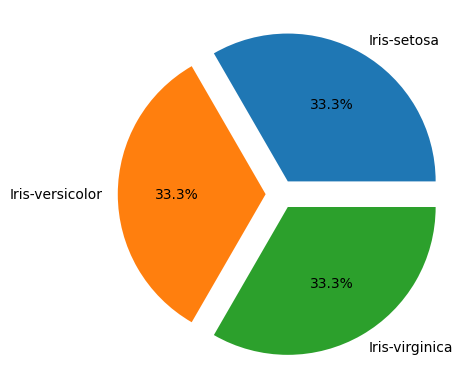

In [12]:
import matplotlib.pyplot as plt
counter = df['species'].value_counts()
plt.pie(counter, labels = df['species'].unique(), autopct = '%1.1f%%', explode = (.1,.1,.1))
plt.show()

In [11]:
import plotly.express as px

counter = df['species'].value_counts().reset_index()
counter.columns = ['species', 'count']

fig = px.pie(counter, names='species', values='count',
             title='Species Distribution',hole=0.3)

fig.update_traces(pull=[0.1]*len(counter), textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width=1)))

fig.show()

In [13]:
fig = px.scatter(data_frame = df, x = 'sepal_length', color = 'species')
fig.update_layout(width = 800, height = 600,
                 xaxis = dict(title = 'Sepal Length', color = '#BF40BF'),
                 yaxis = dict(title = 'Flower Name', color = '#BF40BF'))
fig.show()

In [14]:
fig = px.scatter(data_frame = df, x = 'sepal_width', color = 'species')
fig.update_layout(width = 800, height = 600,
                 xaxis = dict(title = 'Sepal Width', color = '#BF40BF'),
                 yaxis = dict(title = 'Flower Name', color = '#BF40BF'))
fig.show()

In [15]:
fig = px.scatter(data_frame = df, x = 'petal_length', color = 'species')
fig.update_layout(width = 800, height = 600,
                 xaxis = dict(title = 'Petal Length', color = '#BF40BF'),
                 yaxis = dict(title = 'Flower Name', color = '#BF40BF'))
fig.show()

In [16]:
fig = px.scatter(data_frame = df, x = 'petal_width', color = 'species')
fig.update_layout(width = 800, height = 600,
                 xaxis = dict(title = 'Petal Width', color = '#BF40BF'),
                 yaxis = dict(title = 'Flower Name', color = '#BF40BF'))
fig.show()

In [17]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['species'] = le.fit_transform(df['species'])

In [19]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [24]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [25]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

svc_model = GridSearchCV(model, param_grid, verbose = 1)

In [27]:
svc_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [28]:
svc_model.best_params_

{'C': 100, 'gamma': 0.01}

In [29]:
y_pred = svc_model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Accuracy: {accuracy_score(y_pred, y_test):.2f}')

Accuracy: 0.93


<Axes: >

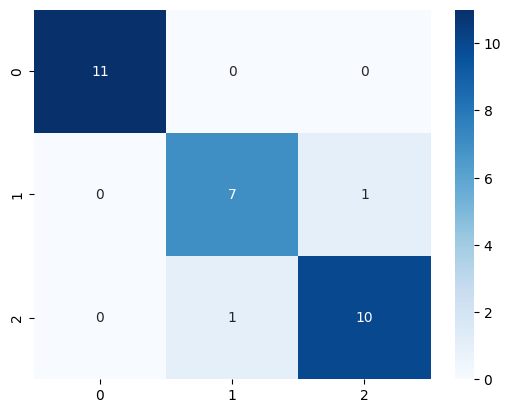

In [31]:
import seaborn as sns

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap = 'Blues')

In [32]:
prediction = svc_model.predict([[7.3, 2.9, 6.3, 1.8]])
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([2])

In [33]:
decode_labels = le.inverse_transform(prediction)
decode_labels

array(['Iris-virginica'], dtype=object)

In [34]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [35]:
prediction = svc_model.predict([[4.9, 3.0, 1.4, 0.2]])
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([0])

In [36]:
decode_labels = le.inverse_transform(prediction)
decode_labels

array(['Iris-setosa'], dtype=object)

In [37]:
import pickle

with open('Iris_Model.pkl', 'wb') as file:
    pickle.dump(svc_model, file)